## Machine Learning Applied to Bike Sharing Demand Data

---

In a recent research article published in the journal Computer Communications, authors Sathishkumar V E, Jangwoo Park, and Yongyun Cho sought to predict the "bike count required at each hour for the stable supply of rental bikes"[1]. They employed several regression models, including linear regression.
In this project I will employ 2 machine learning techniques to make predictions of the bike count and then compute and compare the performance measures of the predictions, alongside plotting histograms and scatter graphs to make clear the results of our predictions. 

[1] Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for
bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153,
pp.353-366, March, 2020.

In [1]:
# importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

I begin by reading the *'SeoulBikeData_mod.csv'*, ie the data, into a data frame. Below is an overview of the different attributes within the data and some key statistics for each.

In [2]:
# reading data into a data frame
BikeData = pd.read_csv("SeoulBikeData_mod.csv")

# describing the data
BikeData.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
count,4416.000000,4416.00000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000
mean,704.591259,11.50000,13.203986,59.257246,1.653193,1398.641304,4.723958,0.560181,0.139312,0.070879,5.956522
std,637.407244,6.92297,11.529724,20.162981,0.976361,621.560536,12.671445,0.860496,1.145271,0.437416,3.407262
min,0.000000,0.00000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,189.000000,5.75000,4.500000,44.000000,0.900000,853.000000,-3.500000,0.000000,0.000000,0.000000,3.000000
50%,542.000000,11.50000,14.300000,58.000000,1.500000,1621.000000,6.400000,0.010000,0.000000,0.000000,5.000000
75%,1047.000000,17.25000,22.200000,75.000000,2.200000,1999.000000,14.900000,0.910000,0.000000,0.000000,9.000000
max,3298.000000,23.00000,38.000000,98.000000,6.700000,2000.000000,26.800000,3.520000,35.000000,8.800000,11.000000


Next I have plotted both a histogram and a box plot of the 'rented bike count'.
The histogram shows the frequency of each bike count, ie how often a specific number of bikes were rented out per hour. We see that the frequency decreases, almost exponentially, as the bike count increases.

The box plot tells us that the mean is slightly over 500 and the bike count tends to be roughly between 0 and 1000 (the interquartile range). There are a number of outliers which lie around the 2500, 3000 mark.

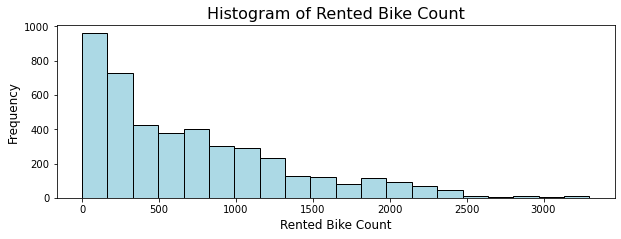

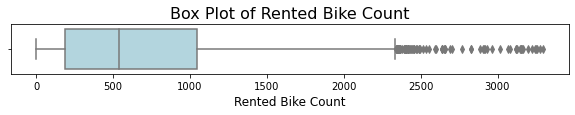

In [3]:
# putting Rented Bike Count into a pandas series
BikeCount = BikeData['Rented Bike Count']

# plotting a histogram of Rented Bike Count
plt.figure(figsize=(10,7))
plt.subplot(211)
plt.hist(BikeCount, bins = 20, color='#acd9e5', edgecolor='k')
plt.xlabel('Rented Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Rented Bike Count', fontsize=16)
plt.show()

plt.figure(figsize=(10,2))
plt.subplot(212)
sns.boxplot(x = BikeCount, color = '#acd9e5')
plt.xlabel('Rented Bike Count', fontsize=12)
plt.title('Box Plot of Rented Bike Count', fontsize=16)
plt.show()

Below are two violin plots, one representing the rented bike count by month and the other by hour.

The plot representing the rented bike count by month shows a distinct increase in the count in the middle of the year with it remaining high from month 5 (May) through to 9 (September). During the winter months we see a large drop off in the bike count in particular in month 1 (January).

The plot representing the rented bike count by hour suggests that the bike count is low in the early hours of the morning <br> (hours 0 - 6). We then see a spike at 8AM followed by a decrease until 11AM where the bike count steadily increases to reach a maximum at around 6PM. After hour 6 the bike count then falls.

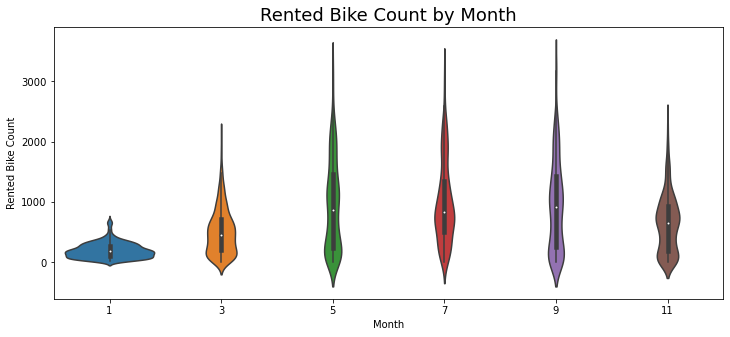

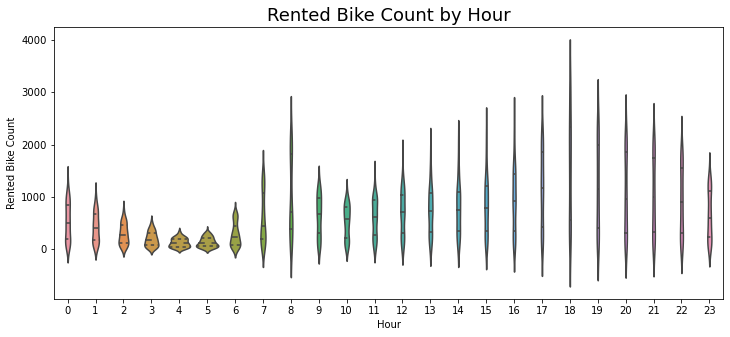

In [4]:
# --- producing violin plots --- #
# Rented Bike Count against different months of the year
plt.figure(figsize=(12,5))
sns.violinplot(x ='Month', y ='Rented Bike Count', data=BikeData)
plt.title('Rented Bike Count by Month', fontsize=18)
plt.show()

# Rented Bike Count against the hour
plt.figure(figsize=(12,5))
sns.violinplot(x ='Hour', y ='Rented Bike Count', data=BikeData, inner='quartile')
plt.title('Rented Bike Count by Hour', fontsize=18)
plt.show()

---

Now I employ my machine learning techniques. Firstly I will use a linear regression to make a prediction of the rented bike count using a set of test data consisting of all columns of *'SeoulBikeData_mod.csv'* except the 'Rented Bike Count' column.

In [5]:
# Creating a new data frame and series
X = BikeData.drop(['Rented Bike Count'], axis=1)
y = BikeData['Rented Bike Count']

# Performing a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
# creating a linear regression model
regr = linear_model.LinearRegression()

# training linear regression
regr.fit(X_train, y_train)

LinearRegression()

In [7]:
# obtaining our prediction
y_pred = regr.predict(X_test)

# forming the residual
resid = y_test - y_pred

Below I print the performance measures of our linear regression. These include: Rsquared (R2); Root Mean Squared Error (RMSE); Mean Absolute Error (MAE), and Coefficient of Variation (CV). We see that the prediction could be more accurate. We will see that there are better models of machine learning for this specific data set.

In [8]:
# --- computing our performance measures --- #
# Rsquared (R2)
r2 = r2_score(y_test, y_pred)
print("The Rsquared (R2) of our prediction is =", r2)

# Root Mean Squared Error (RMSE)
RMSE = np.sqrt(np.mean(resid**2))
print("The Root Mean Squared Error (RMSE) of our prediction is =", RMSE)

# Mean Absolute Error (MAE)
MAE = np.mean(np.abs(resid))
print("The Mean Absolue Error (MAE) of our prediction is =", MAE)

# Coefficient of Variation (CV)
CV = 100 * RMSE/np.mean(y_test)
print("The Coefficient of Variation (CV) of our prediction is =", CV,"%")


The Rsquared (R2) of our prediction is = 0.41463066046384445
The Root Mean Squared Error (RMSE) of our prediction is = 476.0434427546887
The Mean Absolue Error (MAE) of our prediction is = 343.8670160034074
The Coefficient of Variation (CV) of our prediction is = 68.22373104738405 %


Next I plot a histogram of the of both the true rented bike count for our test data set and our prediction using a linear regression. I see that there is a notable difference between each graph, with the true count peaking around slightly over zero frequency whereas the predicted count having a peak frequency roughly around 750.

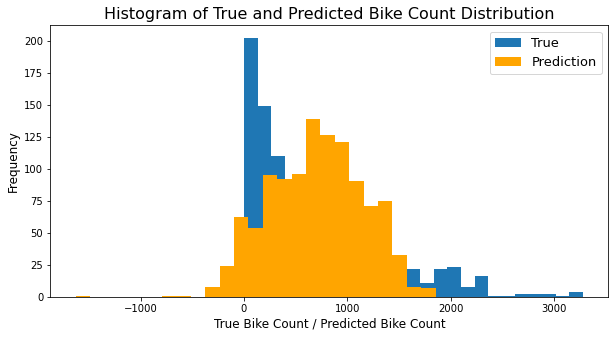

In [9]:
# plotting histograms of y_test and y_pred
plt.figure(figsize=(10, 5))
plt.hist(y_test, bins=25, label = 'True')
plt.hist(y_pred, bins=25, color='orange', label='Prediction')
plt.xlabel('True Bike Count / Predicted Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of True and Predicted Bike Count Distribution', fontsize=16)
plt.legend(prop={"size":13})
plt.show()

Below I plot a number of scatter graphs of 'Rented Bike Count', 'Month', and 'Rainfall(mm)' against the 'residuals' which I calculated by subtracting the predicted values from the true values of the bike count.

The first I have plotted is 'Rented Bike Count' against 'Residuals'. We see as the bike count increases the residual tends to increase, suggesting that the larger the bike count the worse the reliability.

Note: The points are colourmapped according to the hour.

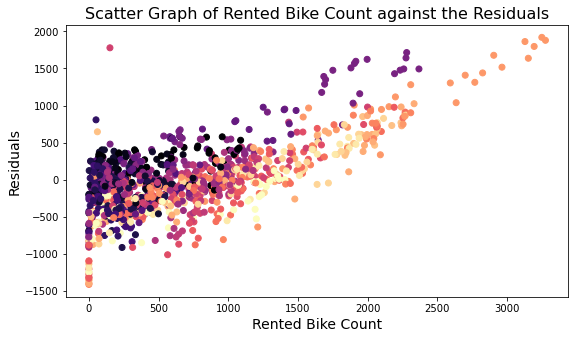

In [10]:
# creating a pandas series of just the different hours from the X_test data frame
H = X_test['Hour']

# plotting a scatter graph of the residual as a function of y_test
plt.figure(figsize=(9,5))
plt.scatter(y_test, resid, c=H, cmap='magma')
plt.xlabel('Rented Bike Count', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Scatter Graph of Rented Bike Count against the Residuals', fontsize=16)
plt.show()

Next I plot the scatter graph of 'Month' against 'Residuals'. In this plot we see that early in the year the redsiduals tend to be less. As the year progresses we see the residuals become more spread out with them appearing to be most spread out around month 9 (September) and then becoming slightly more grouped together towards the end of the year. This would seem to imply a greater reliability of the prediction earlier in the year with it seeming to become less reliable as the year progresses, with a the bigger the residual meaning the bigger the difference between the true and predicted value of the linear regression.

Note: The points are colourmapped according to the absolute value of the residuals.

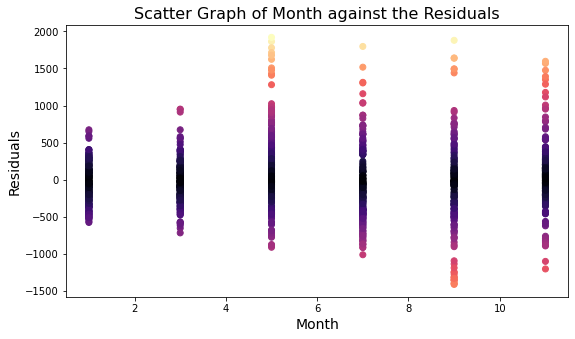

In [11]:
# creating a pandas series of the absolute value of the residuals
abs_resid = np.abs(resid)

# plotting a scatter graph of the residual as a function of X_test['Month']
plt.figure(figsize=(9,5))
plt.scatter(X_test['Month'], resid, c=abs_resid, cmap='magma')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Scatter Graph of Month against the Residuals', fontsize=16)
plt.show()

Below I plot my final scatter graph, this time of 'Rainfall(mm)' against 'Residuals'. It's obvious to see from below that the majority of data collected was collected when there was no rainfall. In the cases where there was some rain we observe that as the amount of rainfall increases, the residuals tend to increase as well, implying that the regression is less accurate the more rainfall there is.

Note: The points are colourmapped according to the absolute value of the residuals.

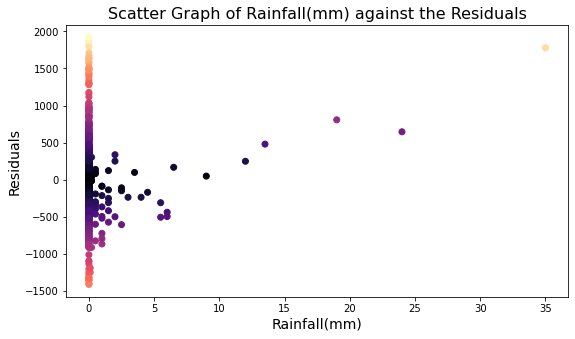

In [12]:
# creating a pandas series of the absolute value of the residuals
abs_resid = np.abs(resid)

# plotting a scatter graph of the residual as a function of X_test['Rainfall(mm)']
plt.figure(figsize=(9,5))
plt.scatter(X_test['Rainfall(mm)'], resid, c=abs_resid, cmap='magma')
plt.xlabel('Rainfall(mm)', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Scatter Graph of Rainfall(mm) against the Residuals', fontsize=16)
plt.show()

---

Finally, I will quickly employ another machine learning technique, a *'decision tree regressor'*. This will hopefully give us a more accurate prediction of 'Rented Bike Count'.

In [13]:
# Creating and training DecisionTreeRegressor
Tree =  DecisionTreeRegressor(max_depth=8)
Tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [14]:
# Predicting using the DecisionTreeRegressor
y_pred1 = Tree.predict(X_test)

In [15]:
# calculating residuals
resid_1 = y_test - y_pred1

I repeat what I did for our linear regression and compute the: Rsquared(R2); Root Mean Squared Error(RMSE); Mean Absolute Error (MAE), and Coefficient of Variation (CV). The results are printed below. I can see from the below performance measures that this prediction, using a *'decision tree regressor'* is notably more accurate than our previous one which used a *'linear regression'*. For example my Rsquared value is larger than before which  indiactes a higher accuracy.

In [16]:
# --- computing our performance measures --- #
# Rsquared (R2)
r2_1 = r2_score(y_test, y_pred1)
print("The Rsquared (R2) of our decision tree regression prediction is =", r2_1)

# Root Mean Squared Error (RMSE)
RMSE_1 = np.sqrt(np.mean(resid_1**2))
print("The Root Mean Squared Error (RMSE) of our decision tree regression prediction is =", RMSE_1)

# Mean Absolute Error (MAE)
MAE_1 = np.mean(np.abs(resid_1))
print("The Mean Absolute Error (MAE) of our decision tree regression prediction is =", MAE_1)

# Coefficient of Variation (CV)
CV_1 = 100 * RMSE_1/np.mean(y_test)
print("The Coefficient of Variation (CV) of our decision tree regression prediction is =", CV_1,"%")


The Rsquared (R2) of our decision tree regression prediction is = 0.6671225523247333
The Root Mean Squared Error (RMSE) of our decision tree regression prediction is = 358.98292193875403
The Mean Absolute Error (MAE) of our decision tree regression prediction is = 219.31226525904316
The Coefficient of Variation (CV) of our decision tree regression prediction is = 51.447309462414374 %


Below is a histogram of the True bike count and our new prediction. Comparing with my last prediction, we can see visually that the new regression has given us a much more accuarate prediction, with the overall shape of the histograms matching much more closely. For example, the graphs peak at a much more similar frequency and similar rented bike count, ie nearer to zero. Also the prediction graph decreases as the bike count increases in much the same way as the true graph.

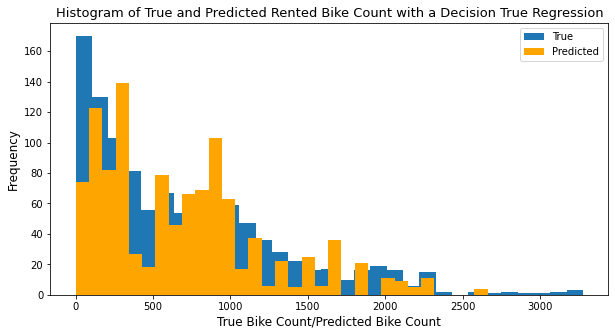

In [17]:
# plotting histograms of y_pred1 and y_test
plt.figure(figsize=(10, 5))
plt.hist(y_test, bins=31, label='True')
plt.hist(y_pred1, bins=31, color = 'orange', label='Predicted')
plt.xlabel('True Bike Count/Predicted Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of True and Predicted Rented Bike Count with a Decision True Regression', fontsize=13)
plt.legend()
plt.show()

---



## Conclusion
I have employed two machine learning techniques *'Linear Regression'* and *'Decision Tree Regression'* which learned from our designated random training dataset, which included information on variables such as month, hour, rainfall, temperature, etc... to produce two sets of predictions of the 'Rented Bike Count'. Throughout the above project I have compared my predictions with the true 'Rented Bike Count' through the means of computing performance measures and plotting histograms and scatter graphs. (Note that the true 'Rented Bike Count' is the real rented bike count corresponding to the test data set which I tested my regressions on).<br>
By comparing performance measures I observed that the *Decision Tree Regression* produced a more accurate prediction than the *Linear Regression*,as for example the linear regression had an Rsquared = 0.415 compared with the linear regression having an Rsquared = 0.667.<br>
The research article, which produced the dataset I used, also used a linear regression (alongside other more accurate techniques).  By comparing my linear regression with theirs we can see a similarity in the results.<br>
My linear regression had: $R2 = 0.415, RMSE = 476.04, MAE = 343.87, CV = 68.22%$ <br>
The research article had: $R2 = 0.55, RMSE = 427.71, MAE =  322.32, CV = 61.03%$ <br>
Its obvious there are differences however the values are roughly similar. The differences may be due to the fact that in this project I used a modified dataset.